## COVID-19 Israel Mapping 

based on app 'hamagen' data source at:
https://gisweb.azureedge.net/Points.json

In [76]:
import json
import pandas as pd
import datetime as dt
from urllib.request import urlopen

# reading from file
with open('../data/hamagen/Points.json') as data_file:    
    data = json.load(data_file)  
    
# can also read from url (commented out for dev)     
# data = json.loads(urlopen('https://gisweb.azureedge.net/Points.json').read())    

df = pd.json_normalize(data["features"])
df = df.drop(['id','type','geometry.type','properties.OBJECTID','properties.sourceOID','properties.Name', 'properties.stayTimes','properties.POINT_X','properties.POINT_Y'], axis=1)
df['x'] = df.apply(lambda x: x['geometry.coordinates'][0], axis=1)
df['y'] = df.apply(lambda x: x['geometry.coordinates'][1], axis=1)
df['from'] = df.apply(lambda x: dt.datetime.fromtimestamp(x['properties.fromTime']//1000), axis=1)
df['to'] = df.apply(lambda x: dt.datetime.fromtimestamp(x['properties.toTime']//1000), axis=1)
df = df.drop(['geometry.coordinates', 'properties.fromTime', 'properties.toTime'], axis=1)
df

,properties.Place,properties.Comments,x,y,from,to
0,סופרמרקט חינם פלוס צומת תנובות,,34.961795,32.312599,2020-03-08 16:30:00,2020-03-08 17:30:00
1,בית חולים בילינסון,מעבר דרך חדר מיון לחדר בידוד,34.866867,32.089157,2020-03-08 21:00:00,2020-03-08 22:00:00
2,קניון רחובות,קופת חולים לאומית,34.806824,31.893307,2020-03-09 11:05:00,2020-03-09 11:40:00
3,"מקסטוק"" נתיבות",,34.600660,31.419526,2020-03-08 22:00:00,2020-03-08 22:30:00
4,מרפאה כללית אופקים (מישור הגפן),,34.612615,31.310954,2020-03-10 10:40:00,2020-03-10 11:00:00
...,...,...,...,...,...,...
885,"סופרמרקט ""אושר עד"", רח' הקישון 11, בני ברק",,34.829722,32.098889,2020-03-13 02:00:00,2020-03-13 02:00:00
886,"בית כנסת קהל חסידים, רח' חולדה הנביאה 10, בני ברק",,34.829777,32.078143,2020-03-14 02:00:00,2020-03-14 02:00:00
887,"סופרמרקט ""יש חסד"" מרכז רימונים, רח' אהרונוביץ ...",,34.838931,32.090801,2020-03-14 02:00:00,2020-03-14 02:00:00
888,"בית כנסת אמרי שפר, רח' קצנלבוגן 1, הר נוף, ירו...",,35.173990,31.789642,2020-03-14 02:00:00,2020-03-14 02:00:00


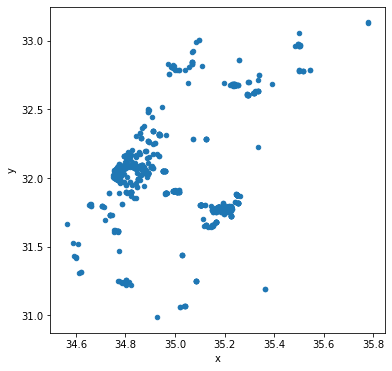

In [79]:
import matplotlib.pyplot as plt

df.plot(kind="scatter",x='x', y='y', figsize=(6,6))
plt.show()


<Figure size 2880x1440 with 0 Axes>

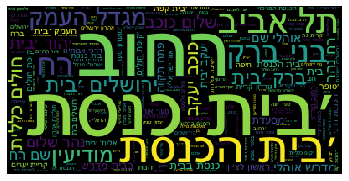

<Figure size 2880x1440 with 0 Axes>

In [116]:
import wordcloud
from bidi.algorithm import get_display
import numpy as np

text = df['properties.Place'].values 
bidi_text = get_display(np.array2string(text))

wordcloud = wordcloud.WordCloud(font_path='/System/Library/Fonts/ArialHB.ttc').generate(str(bidi_text))
print(wordcloud)

plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(40,20))
#plt.show()